In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
source = pd.read_csv('../data/source.csv')
sce_rollup = pd.read_csv('../data/rollup/sce_rollup_2019.csv')

In [21]:
sce_rollup

,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit,Hftd,Total Customers Impacted,Residential Customers,Commercial/Industrial Customers,Medical Baseline Customers,Other Customers,Residential,Commercial,Medical,Other
0,SCE,2019-01-01 02:27:00,2019-01-01 17:08:00,"0 days,14 hrs,41 min",0.611806,14.683333,TAIWAIN,XXX,34.0,0.0,0.0,0.0,0.0,False,False,False,False
1,SCE,2019-09-24 14:46:00,2019-09-24 20:34:00,"0 days,5 hrs,48 min",0.241667,5.800000,SADDLEBACK,TIER 3,9.0,9.0,0.0,0.0,0.0,True,False,False,False
2,SCE,2019-09-24 14:46:00,2019-09-24 20:34:00,"0 days,5 hrs,48 min",0.241667,5.800000,DYSART,TIER 3,76.0,76.0,0.0,0.0,0.0,True,False,False,False
3,SCE,2019-10-09 11:57:00,2019-10-09 19:41:00,"0 days,7 hrs,44 min",0.322222,7.733333,CANEBRAKE,Tier 2/Tier 3,63.0,63.0,0.0,0.0,0.0,True,False,False,False
4,SCE,2019-10-09 15:13:00,2019-10-09 19:27:00,"0 days,4 hrs,14 min",0.176389,4.233333,CANEBRAKE,Tier 2/Tier 3,122.0,101.0,0.0,0.0,0.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,SCE,2019-11-25 11:16:00,2019-11-25 16:56:00,"0 days,5 hrs,40 min",0.236111,5.666667,BIRCHIM,NaN,386.0,371.0,8.0,7.0,0.0,True,True,True,False
231,SCE,2019-11-25 11:39:00,2019-11-26 09:20:00,"0 days,21 hrs,41 min",0.903472,21.683333,CONTROL-PLANT 2,NaN,0.0,0.0,0.0,0.0,0.0,False,False,False,False
232,SCE,2019-11-25 14:16:00,2019-11-27 09:04:00,"1 days,18 hrs,48 min",1.783333,42.800000,TUBA,NaN,25.0,2.0,23.0,0.0,0.0,True,True,False,False
233,SCE,2019-11-25 17:40:00,2019-11-26 14:20:00,"0 days,20 hrs,40 min",0.861111,20.666667,CLARINET,NaN,71.0,39.0,32.0,0.0,0.0,True,True,False,False


In [5]:
source_rollup = source.merge(sce_rollup[~(sce_rollup["Circuit"].duplicated(keep="last"))], on="Circuit", how="inner")
source_rollup.head()

,Circuit,Weather Station,Wind Sustained,Gust Sustained,Thresholds (Sustained/ Gust),FPI Value,Reasons for De‐Energization,month,days,year,...,Hftd,Total Customers Impacted,Residential Customers,Commercial/Industrial Customers,Medical Baseline Customers,Other Customers,Residential,Commercial,Medical,Other
0,BOOTLEGGER,SCE Antelope Valley Fwy,16.00,41.00,31/46,13.98,"Exceeded Threshold, Exceeded FPI,",Sept,5-11,2020,...,NaN,1498.0,1399.0,61.0,28.0,0.0,True,True,True,False
1,BOOTLEGGER,SCE Acton Canyon,22.40,44.60,31/46,13.01,"High Wind Trend, Exceeded FPI,",Nov,29,2020,...,NaN,1498.0,1399.0,61.0,28.0,0.0,True,True,True,False
2,BOOTLEGGER,ACTON CANYON,25.17,41.94,31/46,13.01,"High Wind Trend, Exceeded FPI,",Nov,24-28,2020,...,NaN,1498.0,1399.0,61.0,28.0,0.0,True,True,True,False
3,BOOTLEGGER,SCE Palamino Dr,25.63,47.86,31 / 46,14.15,"Exceeded Threshold, High Wind Trend, Exceeded ...",Oct,23-28,2020,...,NaN,1498.0,1399.0,61.0,28.0,0.0,True,True,True,False
4,BOOTLEGGER,SCE Acton Canyon,22.20,47.10,31/46,13.90,"Exceeded Threshold, Exceeded FPI,",Dec,16-24,2020,...,NaN,1498.0,1399.0,61.0,28.0,0.0,True,True,True,False


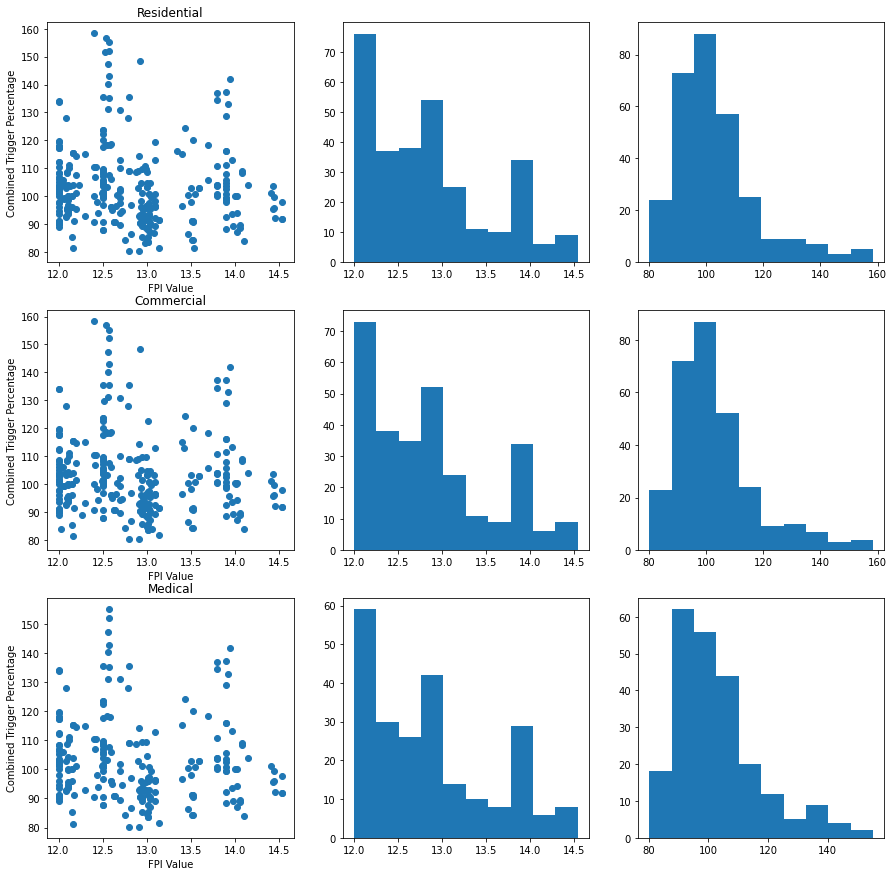

In [4]:
fig, ax = plt.subplots(3,3, figsize = (15,15))

filters = ["Residential", "Commercial", "Medical"]

for (axi,f) in zip(ax, filters):
    axi[0].set_title(f)
    
    data_f = source_rollup[source_rollup[f]==True][["FPI Value", "Combined Trigger Percentage"]].values
    
    axi[0].scatter(data_f[:,0], data_f[:,1])
    axi[1].hist(data_f[:,0])
    axi[2].hist(data_f[:,1])

    axi[0].set_xlabel("FPI Value")
    axi[0].set_ylabel("Combined Trigger Percentage")

In [6]:
numeric_columns = ["Residential Customers", "Commercial/Industrial Customers", "Medical Baseline Customers", "Other Customers"]
for c in numeric_columns:
    source_rollup[c] = pd.to_numeric(source_rollup[c], errors='coerce')
    source_rollup[c].fillna(0, inplace=True)
    boolean_column = c.split(" ")[0].split("/")[0]
    source_rollup[boolean_column] = source_rollup[c] > 0

In [7]:
source_rollup[numeric_columns].describe()

,Residential Customers,Commercial/Industrial Customers,Medical Baseline Customers,Other Customers
count,312.000000,312.000000,312.000000,312.0
mean,887.448718,36.285256,16.612179,0.0
std,778.644050,28.176614,16.923706,0.0
min,0.000000,0.000000,0.000000,0.0
25%,56.000000,9.000000,0.000000,0.0
50%,772.000000,34.000000,13.000000,0.0
75%,1399.000000,50.000000,28.000000,0.0
max,2900.000000,119.000000,74.000000,0.0


### Residential, Commerical, Medical Customers impacted during Jan 2021 PSPS event

In [18]:
jan_cust = source_rollup[source_rollup.month=="Jan"][numeric_columns]

In [19]:
jan_cust.sum()

Residential Customers              84973.0
Commercial/Industrial Customers     3594.0
Medical Baseline Customers          1477.0
Other Customers                        0.0
dtype: float64

In [20]:
jan_cust.describe()

,Residential Customers,Commercial/Industrial Customers,Medical Baseline Customers,Other Customers
count,87.000000,87.000000,87.000000,87.0
mean,976.701149,41.310345,16.977011,0.0
std,825.423078,28.355841,16.469123,0.0
min,0.000000,0.000000,0.000000,0.0
25%,127.500000,24.000000,1.000000,0.0
50%,777.000000,45.000000,13.000000,0.0
75%,1522.000000,51.000000,33.500000,0.0
max,2684.000000,119.000000,54.000000,0.0
